In [1]:
from Networks.iResNet import iResNet3D
from Saving.saveFile import get_next_model_filename
from Trainers import split_data,Trainer
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import joblib

In [2]:
# 初始化模型
input_shape = (2,)  # 输入形状
full_connect_shape = (128, 32, 32, 16)  # 全连接层目标形状，根据 true_output0 的形状确定
q = 2  # BB 的数量
N = 3  # 每个 BB 中 SB 的数量

output_keys = ["T", "w"]

model = iResNet3D(input_shape, full_connect_shape, q, N, output_keys)

# # 打印模型结构
# print(model)

In [3]:
input_np = joblib.load('preData/nonuni/input_all.joblib').astype(np.float32)
T_train_np = joblib.load('preData/nonuni/T_train.joblib').astype(np.float32)
w_train_np = joblib.load('preData/nonuni/w_train.joblib').astype(np.float32)

input_train = torch.from_numpy(input_np).unsqueeze(1)
T_train = torch.from_numpy(T_train_np).unsqueeze(1)
w_train = torch.from_numpy(w_train_np).unsqueeze(1)

targets_train = {"T": T_train, "w": w_train}


In [4]:
# 定义损失函数和优化器
criterions = {
    "T": nn.MSELoss(),  # 针对 T 的损失函数
    "w": nn.MSELoss(),  # 针对 w 的损失函数
}
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# 导入数据
train_loader, val_loader = split_data(input_train, targets_train, batch_size=1000)
trainer = Trainer(model, optimizer, criterions, device="cuda")

In [6]:
# 训练
save_path = get_next_model_filename(prefix='PIRN_nonuni')
trainer.fit(train_loader, val_loader, num_epochs=100000, early_stop_patience=100, save_path=save_path)

Training:   0%|          | 0/100000 [00:00<?, ?it/s]

Epoch 1/100000 | Train Loss: 88.4031 | Val Loss: 7619.4600
Epoch 2/100000 | Train Loss: 7665.2964 | Val Loss: 59.6387
Epoch 3/100000 | Train Loss: 49.6805 | Val Loss: 95.2803
Epoch 4/100000 | Train Loss: 75.7390 | Val Loss: 77.1364
Epoch 5/100000 | Train Loss: 61.9260 | Val Loss: 72.9369
Epoch 6/100000 | Train Loss: 72.9017 | Val Loss: 76.9992
Epoch 7/100000 | Train Loss: 80.4417 | Val Loss: 63.1741
Epoch 8/100000 | Train Loss: 61.6229 | Val Loss: 58.5213
Epoch 9/100000 | Train Loss: 50.2110 | Val Loss: 65.9262
Epoch 10/100000 | Train Loss: 52.8563 | Val Loss: 72.6172
Epoch 11/100000 | Train Loss: 57.3093 | Val Loss: 74.9598
Epoch 12/100000 | Train Loss: 58.9676 | Val Loss: 74.0924
Epoch 13/100000 | Train Loss: 58.2769 | Val Loss: 70.7814
Epoch 14/100000 | Train Loss: 55.7708 | Val Loss: 65.5254
Epoch 15/100000 | Train Loss: 51.8936 | Val Loss: 58.8316
Epoch 16/100000 | Train Loss: 47.1766 | Val Loss: 51.5676
Epoch 17/100000 | Train Loss: 42.5130 | Val Loss: 45.3132
Epoch 18/100000 | T

In [ ]:
trainer.plot_loss()

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
save_path = get_next_model_filename(prefix='PIRN_nonuni')
trainer.fit(train_loader, val_loader, num_epochs=100000, early_stop_patience=1000, save_path=save_path)

Training:   0%|          | 0/100000 [00:00<?, ?it/s]

Epoch 1/100000 | Train Loss: 637353.3125 | Val Loss: 16835722.0000
Epoch 2/100000 | Train Loss: 635931.3750 | Val Loss: 16844248.0000
Epoch 3/100000 | Train Loss: 634812.1250 | Val Loss: 16839936.0000
Epoch 4/100000 | Train Loss: 633235.1250 | Val Loss: 16825800.0000
Epoch 5/100000 | Train Loss: 631554.5000 | Val Loss: 16821710.0000
Epoch 6/100000 | Train Loss: 630906.9375 | Val Loss: 16811430.0000
Epoch 7/100000 | Train Loss: 629300.5000 | Val Loss: 16816916.0000
Epoch 8/100000 | Train Loss: 628817.1250 | Val Loss: 16806392.0000
Epoch 9/100000 | Train Loss: 626850.1250 | Val Loss: 16778140.0000
Epoch 10/100000 | Train Loss: 626321.4375 | Val Loss: 16770414.0000
Epoch 11/100000 | Train Loss: 624780.5000 | Val Loss: 16770861.0000
Epoch 12/100000 | Train Loss: 623517.5000 | Val Loss: 16761947.0000
Epoch 13/100000 | Train Loss: 621774.2500 | Val Loss: 16744682.0000
Epoch 14/100000 | Train Loss: 620697.9375 | Val Loss: 16738922.0000
Epoch 15/100000 | Train Loss: 619687.0000 | Val Loss: 167

KeyboardInterrupt: 

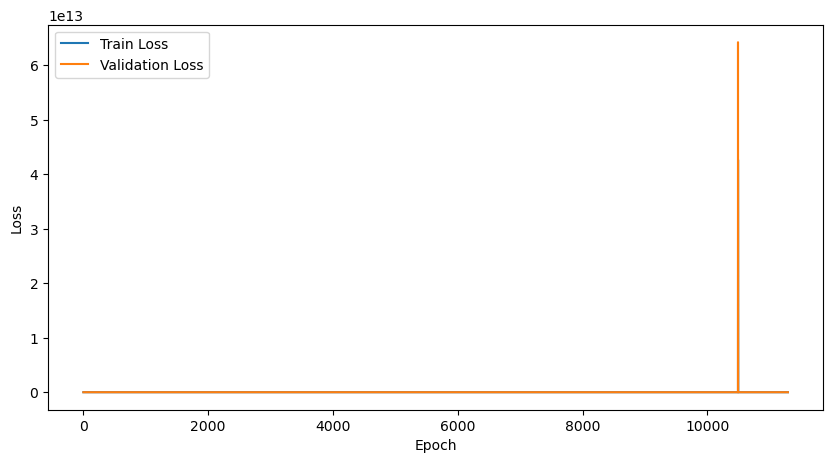

In [8]:
trainer.plot_loss()